In [25]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import csv
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# File to Load 
wine_data = "Resources/Wine_Bottled_2019.csv"
per_capita = "Resources/per_capita_consumption_states_1977_2018_clean.csv"
population = "Resources/CDCPopulationGender.csv"

# Read Wine Production File and store into Pandas data frame
wine_data = pd.read_csv(wine_data)
wine_df = wine_data
wine_df.head(1000)

,State,# of Bottled Still Wines,# of Bottled Effervescence Wines,Month,Year
0,Alabama,30153,200,December,2019
1,Alaska,5247,0,December,2019
2,Arizona,80784,2059,December,2019
3,Arkansas,24197,0,December,2019
4,California,39007466,1110404,December,2019
...,...,...,...,...,...
540,Wisconsin,353647,496,March,2019
541,Wisconsin,156990,0,May,2019
542,Wisconsin,132404,1063,November,2019
543,Wisconsin,257117,483,October,2019


In [26]:
wine_df.dtypes

State                               object
# of Bottled Still Wines             int64
# of Bottled Effervescence Wines     int64
Month                               object
Year                                 int64
dtype: object

In [27]:
#Add Time Column to bottled_wine
bottled_wine['Time'] = time
clean_wine = bottled_wine.drop(['Month', 'Year'], axis = 1)
clean_wine = clean_wine.set_index('Time')
clean_wine_x = date_parser=lambda x: datetime.strptime(Time, '%m/%d/%Y %H:%M')
clean_wine.dtypes

State            object
Still             int64
Effervescence     int64
dtype: object

False

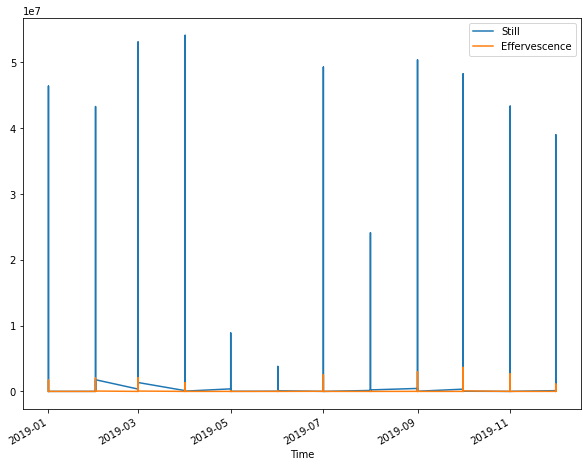

In [28]:
clean_wine.plot(figsize=(10,8))
clean_wine.isnull().values.any()

array([[<AxesSubplot:title={'center':'Still'}>,
        <AxesSubplot:title={'center':'Effervescence'}>]], dtype=object)

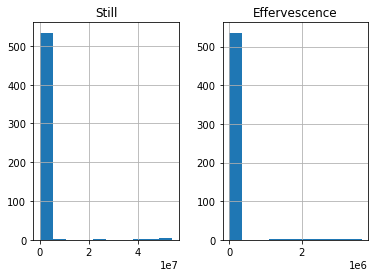

In [29]:
clean_wine.hist()


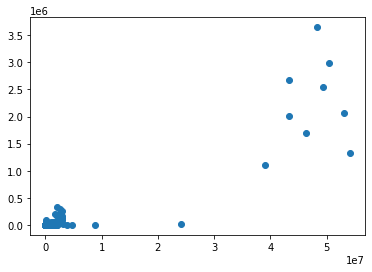

In [30]:
plt.scatter(clean_wine['Still'], clean_wine['Effervescence'])

In [31]:
X = pd.DataFrame(clean_wine['Still'])
y = pd.DataFrame(clean_wine['Effervescence'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.9500979856078613, 0.8022100760353297, 0.7148497234698408]


In [32]:
wine_df.dtypes

State                               object
# of Bottled Still Wines             int64
# of Bottled Effervescence Wines     int64
Month                               object
Year                                 int64
dtype: object

In [11]:
# of Bottled Still Wines by state
bottled_wine = wine_df.copy()
bottled_wine.columns = ['State', 'Still', 'Effervescence', 'Month', 'Year']
bottled_wine.reset_index(drop=True)
bt_wine_df = bottled_wine.drop(columns=['Year'])
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['January'], 'Jan')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['February'], 'Feb')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['March'], 'Mar')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['April'], 'Apr')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['May'], 'May')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['June'], 'Jun')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['July'], 'Jul')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['August'], 'Aug')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['September'], 'Sep')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['October'], 'Oct')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['November'], 'Nov')
bt_wine_df['Month'] = bt_wine_df['Month'].replace(['December'], 'Dec')
#bt_wine_df['Total'] = bt_wine_df.sum(axis=1)
bt_wine_df

,State,Still,Effervescence,Month
0,Alabama,30153,200,Dec
1,Alaska,5247,0,Dec
2,Arizona,80784,2059,Dec
3,Arkansas,24197,0,Dec
4,California,39007466,1110404,Dec
...,...,...,...,...
540,Wisconsin,353647,496,Mar
541,Wisconsin,156990,0,May
542,Wisconsin,132404,1063,Nov
543,Wisconsin,257117,483,Oct


In [33]:
#Change Month to date time
#wine_df = pd.to_datetime(wine_df['Month'])
wine_time = pd.to_datetime(bottled_wine['Year'].astype(str)  + bottled_wine['Month'], format='%Y%B')
wine_time

0     2019-12-01
1     2019-12-01
2     2019-12-01
3     2019-12-01
4     2019-12-01
         ...    
540   2019-03-01
541   2019-05-01
542   2019-11-01
543   2019-10-01
544   2019-09-01
Length: 545, dtype: datetime64[ns]

In [34]:
#Change Month to date time
#wine_df = pd.to_datetime(wine_df['Month'])
time = pd.to_datetime(bottled_wine['Month'].astype(str) + bottled_wine['Year'].astype(str), format='%B%Y')
time = pd.DataFrame({"Date": wine_time})
time.dtypes


Date    datetime64[ns]
dtype: object

In [35]:
#Add Time Column to bottled_wine
bottled_wine['Time'] = time
new_clean_wine = wine_df.drop(['Month', 'Year'], axis = 1)
new_clean_wine

KeyError: "['Year'] not found in axis"

In [36]:
#month_group = effervescence_wine.groupby("Month")
month_group = bt_wine_df.groupby(by=["Month"]).max()
month_group = month_group.reindex(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
month_group

,State,Still,Effervescence
Month,,,
Jan,Wisconsin,46393736,1703832
Feb,Wisconsin,43278480,2012923
Mar,Wisconsin,53093127,2058660
Apr,Wisconsin,54104222,1325336
May,Wisconsin,8873643,43349
Jun,Wisconsin,3792417,41858
Jul,Wisconsin,49278825,2549382
Aug,Wisconsin,24102266,23234
Sep,Wisconsin,50373407,2981503


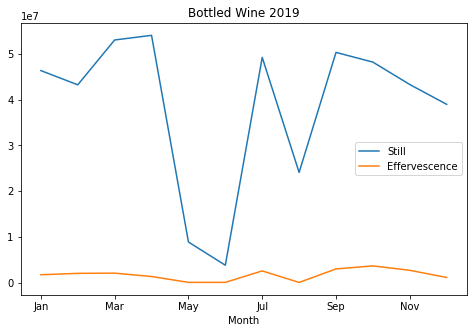

In [37]:
month_group.plot.line(figsize=(8,5), title= 'Bottled Wine 2019')
plt.savefig('Bottled Wine 2019.png')
plt.show()

<AxesSubplot:>

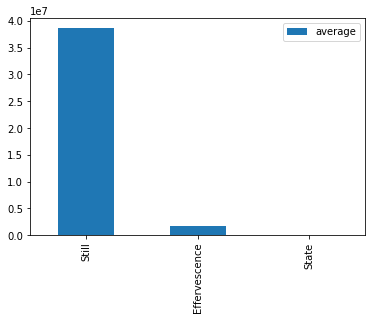

In [38]:

# Plot.
pd.concat(
    [month_group.mean().rename('average'), month_group.min().rename('min'), 
     month_group.max().rename('max')],
    axis=1).plot.bar()

In [39]:
#month_group = effervescence_wine.groupby("Month")
state_group = clean_wine.groupby(by=["State"]).sum()
state_group

,Still,Effervescence
State,,
Alabama,31265,200
Alaska,67714,7150
Arizona,174253,8849
Arkansas,242417,2737
California,463885220,20090343
Colorado,749825,4598
Connecticut,181724,4444
Delaware,23503,0
District Of Columbia,69487,0


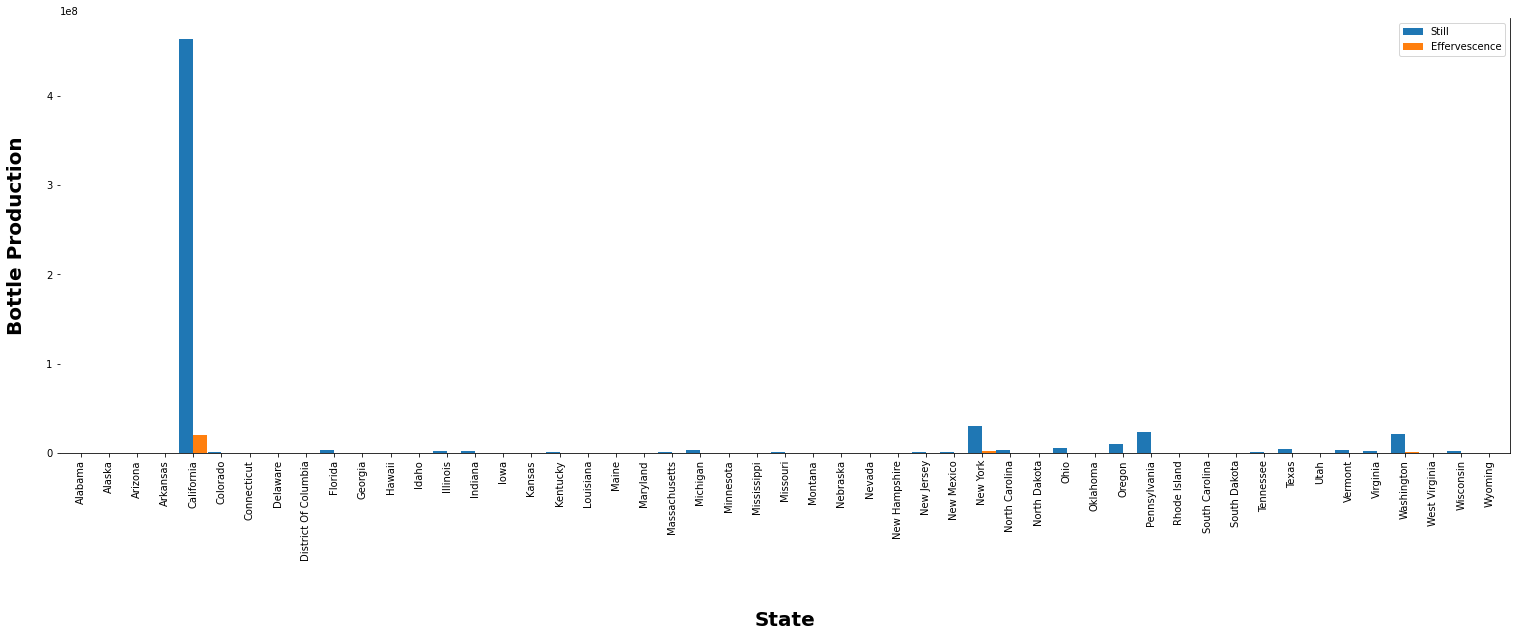

In [42]:
ax = state_group.plot(kind='bar', figsize=(26, 8), zorder=5, width=0.99)

 # Despine
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

 # Switch off ticks
#ax.tick_params(axis="both", which="both", bottom="on", top="off", labelbottom="off", left="off", right="off", labelleft="on")


# Set x-axis label
ax.set_xlabel("State",labelpad=50, weight='bold', size=20)

# Set y-axis label
ax.set_ylabel("Bottle Production", labelpad=20, weight='bold', size=20)
plt.savefig('Bottled Production by State.png')

plt.show()

In [21]:
#example = pd.DataFrame(bt_wine_df)

#y = np.random.rand(10,4)
#y[:,0]= np.arange(10)
#df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

ax = bt_wine_df.plot(x="Month", y="Total", kind="bar")
#bt_wine_df.plot(x="Month", y="Still", kind="bar", ax=ax, color="C2")
#bt_wine_df.plot(x="Month", y="Effervescence", kind="bar", ax=ax, color="C3")

plt.show()

KeyError: 'Total'

In [41]:
month_group.plot(x='Month', y = ["Still", "Effervescence"], kind= "bar")
plt.show()

KeyError: 'Month'